# 4. Variación anual de Ratios Vuelos Puntuales, Retrasados y Cancelados respecto a los totales.

## 4.1 Importación de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient

sns.set_style("darkgrid")

pd.options.display.float_format = '{:,.2f}'.format

## 4.2 Conexión con MONGO ATLAS / LOCAL

In [2]:
#Mongo Atlas
#URI ="mongodb://sato:<PASSWORD>@satoclusterfaa-shard-00-00-gst6h.\
#azure.mongodb.net:27017,satoclusterfaa-shard-00-01-gst6h.azure.\
#mongodb.net:27017,satoclusterfaa-shard-00-02-gst6h.azure.mongodb\
#.net:27017/test?ssl=true&replicaSet=SatoClusterFAA-shard-0&authSource=admin&retryWrites=true"

#client = MongoClient(URI)
#db = client.FAA_Airlines

#local
client = MongoClient()#"mongodb://localhost:27017")
db = client.airports

In [3]:
air = db.airlines

Sería interesante estudiar los **vuelos retrasados, cancelados y puntuales independientemente del volumen de operaciones existentes ya que, como se ha visto anteriormente, los retrasos y las cancelaciones dependen del volumen de tráfico, esto es, son proporcionales de forma directa**.

- **Query 5**

In [4]:
pipeline5 = [{"$match": {"time.year": {"$nin": [2003, 2016]}}},
             {"$group": {"_id": "$time.year", 
                         "Totales": {"$sum": "$statistics.flights.total"},
                         "Retrasados": {"$sum": "$statistics.flights.delayed"},
                         "Cancelados": {"$sum": "$statistics.flights.cancelled"},
                         "Puntuales": {"$sum": "$statistics.flights.on time"}
                        }
             },
             {"$project": {
                          "Ratio_Retrasados": {"$divide": ["$Retrasados", "$Totales"]},
                          "Ratio_Cancelados": {"$divide": ["$Cancelados", "$Totales"]},
                          "Ratio_Puntuales": {"$divide": ["$Puntuales", "$Totales"]}
                          }
             }
            ]

curs5 = air.aggregate(pipeline5)

Con el cursor obtenido de la consulta, se crea un **DataFrame** con los resultados de la misma.

In [5]:
query5 = list(curs5)

In [6]:
df5 = pd.DataFrame(query5).set_index(['_id']).sort_index()
df5.index.name = "Year"
df5

,Ratio_Cancelados,Ratio_Puntuales,Ratio_Retrasados
Year,,,
"2,004.00",0.02,0.78,0.20
"2,005.00",0.02,0.77,0.21
"2,006.00",0.02,0.75,0.23
"2,007.00",0.02,0.73,0.25
"2,008.00",0.02,0.75,0.22
"2,009.00",0.01,0.79,0.19
"2,010.00",0.02,0.80,0.18
"2,011.00",0.02,0.80,0.18
"2,012.00",0.01,0.82,0.17


## 4.3 Gráficos Variación anual de Ratios Vuelos Puntuales, Retrasados y Cancelados respecto a los totales. 

Finalmente, se crean los gráficos correspondientes a las evoluciones de:
- Ratio Vuelos Cancelados
- Ratio Vuelos Retrasados
- Ratio Vuelos Puntuales

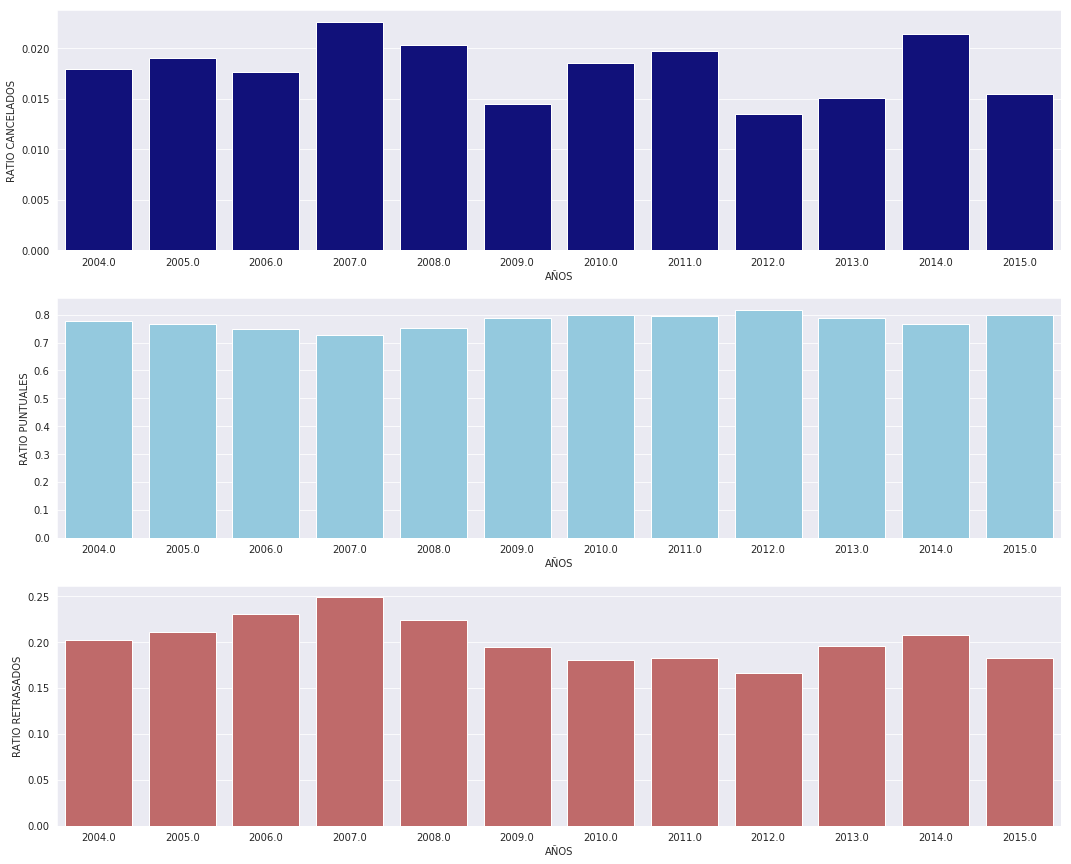

In [7]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,15));

sns.barplot(x=df5.index, y= df5.iloc[:,0], color= "darkblue", ax=ax1);
ax1.set_ylabel("RATIO CANCELADOS");
ax1.set_xlabel("AÑOS");

sns.barplot(x=df5.index, y= df5.iloc[:,1], color= 'SkyBlue', ax=ax2);
ax2.set_ylabel("RATIO PUNTUALES");
ax2.set_xlabel("AÑOS");

sns.barplot(x=df5.index, y= df5.iloc[:,2], color= 'IndianRed', ax=ax3);
ax3.set_ylabel("RATIO RETRASADOS");
ax3.set_xlabel("AÑOS");

## 4.4 Cáculo de Ratios medios, máximos y mínimos en Vuelos Puntuales, Retrasados y Cancelados respecto a los totales.

Como en el apartado anterior, se pretende obtener los ***valores medios, máximos y mínimos*** de los Ratios anteriores durante el período de estudio. Los pasos a seguir son los siguientes.

- Se seleccionan los años que sean distintos a 2003 y 2016.
- Se agrupa por año y se calcula los **ratios**.
- Se genera una **nueva colección** con los ratios. 
- Se calculan los **valores medios, máximos y minimos de los ratios anteriores**.

Con la siguiente query se genera la nueva colección **Ratios_Anuales** que se guarda en **Mongo**.

In [8]:
pipeline5a = [{"$match": {"time.year": {"$nin": [2003, 2016]}}},
             {"$group": {"_id": "$time.year", 
                         "Totales": {"$sum": "$statistics.flights.total"},
                         "Retrasados": {"$sum": "$statistics.flights.delayed"},
                         "Cancelados": {"$sum": "$statistics.flights.cancelled"},
                         "Puntuales": {"$sum": "$statistics.flights.on time"}
                        }
             },
             {"$project": {
                          "Ratio_Retrasados": {"$divide": ["$Retrasados", "$Totales"]},
                          "Ratio_Cancelados": {"$divide": ["$Cancelados", "$Totales"]},
                          "Ratio_Puntuales": {"$divide": ["$Puntuales", "$Totales"]}
                          }
             },
             {"$out": "Ratios_Anuales"}
            ]

air.aggregate(pipeline5a);

- **Query 6. Ratios Medios**

In [9]:
ratios = db.Ratios_Anuales

In [10]:
pipeline6 = [{"$group": {"_id": "null",
                             "Media_Ratio_Retrasados": {"$avg": "$Ratio_Retrasados"},
                             "Media_Ratio_Cancelados": {"$avg": "$Ratio_Cancelados"},
                             "Media_Ratio_Puntuales": {"$avg": "$Ratio_Puntuales"}                       
                             }
                           },
                          {"$project": {"_id": 0}}
                         ]

curs6 = ratios.aggregate(pipeline6)

Medias_Ratio =list(curs6)[0]
Medias_Ratio

{'Media_Ratio_Retrasados': 0.20248100129727428,
 'Media_Ratio_Cancelados': 0.017984020651301773,
 'Media_Ratio_Puntuales': 0.7771698142878684}

Con lo anterior ya se pueden obtener los años en los que:

- **Query 6.1.**

1- Los años en los que los **Cancelaciones fueron mayores en términos relativos** a la media

In [11]:
cancelMmedia = ratios.find({"Ratio_Cancelados": {"$gt": Medias_Ratio["Media_Ratio_Cancelados"]}},
                 {"_id": 1, 'Ratio_Cancelados': 1}).sort("Ratio_Cancelados", -1) 
list(cancelMmedia)                                           

[{'_id': 2007.0, 'Ratio_Cancelados': 0.022620969803159113},
 {'_id': 2014.0, 'Ratio_Cancelados': 0.021415810226867758},
 {'_id': 2008.0, 'Ratio_Cancelados': 0.020347525993877402},
 {'_id': 2011.0, 'Ratio_Cancelados': 0.01974539258454947},
 {'_id': 2005.0, 'Ratio_Cancelados': 0.01902082577840011},
 {'_id': 2010.0, 'Ratio_Cancelados': 0.018519432838974892}]

Se aprecia cómo el **peor año en términos de cancelaciones se produjo en 2007 seguido de 2014**.

- **Query 6.2.**

2- Los años en los que las **Retrasos fueron mayores en términos relativos** a la media

In [12]:
RetrasoMmedia = ratios.find({"Ratio_Retrasados": {"$gt": Medias_Ratio["Media_Ratio_Retrasados"]}},
                 {"_id": 1, 'Ratio_Retrasados': 1}).sort("Ratio_Retrasados", -1) 
list(RetrasoMmedia)   

[{'_id': 2007.0, 'Ratio_Retrasados': 0.24885798970934814},
 {'_id': 2006.0, 'Ratio_Retrasados': 0.230874962144701},
 {'_id': 2008.0, 'Ratio_Retrasados': 0.22405168109100812},
 {'_id': 2005.0, 'Ratio_Retrasados': 0.21163218111169899},
 {'_id': 2014.0, 'Ratio_Retrasados': 0.20820566373245558},
 {'_id': 2004.0, 'Ratio_Retrasados': 0.20269981943662846}]

Se aprecia cómo el **peor año en términos de retrasos se produjo tambien en 2007 seguido de 2006**.

- **Query 6.3.**

3- Los años en los que la **Puntualidad fue mejor en términos relativos** a la media

In [13]:
PuntualMmedia = ratios.find({"Ratio_Puntuales": {"$gt": Medias_Ratio["Media_Ratio_Puntuales"]}},
                 {"_id": 1, 'Ratio_Puntuales': 1}).sort('Ratio_Puntuales', -1) 
list(PuntualMmedia)  

[{'_id': 2012.0, 'Ratio_Puntuales': 0.8180302872865349},
 {'_id': 2015.0, 'Ratio_Puntuales': 0.7990258064149397},
 {'_id': 2010.0, 'Ratio_Puntuales': 0.7982493213639277},
 {'_id': 2011.0, 'Ratio_Puntuales': 0.7954803296718702},
 {'_id': 2009.0, 'Ratio_Puntuales': 0.788161875758251},
 {'_id': 2013.0, 'Ratio_Puntuales': 0.7866391685126827},
 {'_id': 2004.0, 'Ratio_Puntuales': 0.7773516681684843}]

Se aprecia cómo el **mejor año en términos de puntualidad se produjo en 2012 seguido de 2015**.